In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from numpy.linalg import norm
import seaborn as sns
from math import e
import random

In [230]:
def Normalize(x):
    x = (x - x.min() ) / (x.max() - x.min())
    return x

In [231]:
def sigmoid(x,theta,theta0):
    temp=np.dot(x,theta )+theta0
    y = 1 / (1 + np.exp(-temp))
    return y

In [232]:
def cost(y_hat,y,m):
    d=-1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))
    return d

In [233]:
def LogisticRegression(x, y,alpha,itr): 
    m, n = x.shape
    theta=np.random.rand(n)
    theta0=0
    errors= []
    for i in range(itr):  
        y_hat = sigmoid(x,theta,theta0)
        error= cost(y_hat,y,m)
        errors.append(error)
        theta= theta - alpha*(1/m * np.dot(x.T, (y_hat - y)))
        theta0=theta0 - alpha* (1/m * np.sum(y_hat - y))
    errors = np.array(errors)    
    return theta,theta0,errors

In [234]:
def load_data():
    df=pd.read_excel("seed.xlsx")
    df["class"].replace({1: 0., 2: 1., 3: 2.}, inplace=True)
    df_train,df_test= ms.train_test_split(df, train_size=0.8)
    class_1=df_train[df_train['class'] == 0]
    class_2=df_train[df_train['class'] == 1]
    class_3=df_train[df_train['class'] == 2]
    class_1_2=class_1.append(class_2, ignore_index=True)
    class_1_3=class_1.append(class_3, ignore_index=True)
    class_2_3=class_2.append(class_3, ignore_index=True)
    class_1_2_x_trn=class_1_2[["x1","x2",'x3','x4','x5','x6','x7']]
    class_1_2_y_trn=class_1_2[["class"]]
    class_1_3_x_trn=class_1_3[["x1","x2",'x3','x4','x5','x6','x7']]
    class_1_3_y_trn=class_1_3[["class"]]
    class_2_3_x_trn=class_2_3[["x1","x2",'x3','x4','x5','x6','x7']]
    class_2_3_y_trn=class_2_3[["class"]]
    x_tst=df_test[["x1","x2",'x3','x4','x5','x6','x7']]
    y_tst=df_test[['class']]
    x_trn=df_train[["x1","x2",'x3','x4','x5','x6','x7']]
    y_trn=df_train[['class']]
    return class_1_2_x_trn,class_1_2_y_trn,class_1_3_x_trn,class_1_3_y_trn,class_2_3_x_trn,class_2_3_y_trn,x_tst,y_tst,x_trn,y_trn


In [235]:
#prepre data
class_1_2_x_trn,class_1_2_y_trn,class_1_3_x_trn,class_1_3_y_trn,class_2_3_x_trn,class_2_3_y_trn,x_tst,y_tst,x_trn,y_trn=load_data()
class_1_2_x_trn=Normalize(np.asanyarray(class_1_2_x_trn))
class_1_3_x_trn=Normalize(np.asanyarray(class_1_3_x_trn))
class_2_3_x_trn=Normalize(np.asanyarray(class_2_3_x_trn))
x_tst=Normalize(np.asanyarray(x_tst))
x_trn=Normalize(np.asanyarray(x_trn))
class_1_2_y_trn=np.asanyarray(class_1_2_y_trn)
class_1_3_y_trn=np.asanyarray(class_1_3_y_trn)
class_2_3_y_trn=np.asanyarray(class_2_3_y_trn)
y_tst=np.array(y_tst)
y_trn=np.array(y_trn)
class_1_2_y_trn=np.array([1 if y==0 else 0 for y in class_1_2_y_trn ])
class_1_3_y_trn=np.array([1 if y==0 else 0 for y in class_1_3_y_trn ])
class_2_3_y_trn=np.array([1 if y==1 else 0 for y in class_2_3_y_trn ])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11652\556546255.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_1_2=class_1.append(class_2, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11652\556546255.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_1_3=class_1.append(class_3, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11652\556546255.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_2_3=class_2.append(class_3, ignore_index=True)


In [236]:
#create model
theta_m1,theta0_m1,errors_m1 = LogisticRegression(class_1_2_x_trn,class_1_2_y_trn, 0.07,200000)

In [237]:
theta_m2,theta0_m2,errors_m2 = LogisticRegression(class_1_3_x_trn,class_1_3_y_trn, 0.07,200000)

In [238]:
theta_m3,theta0_m3,errors_m3 = LogisticRegression(class_2_3_x_trn,class_2_3_y_trn, 0.07,200000)

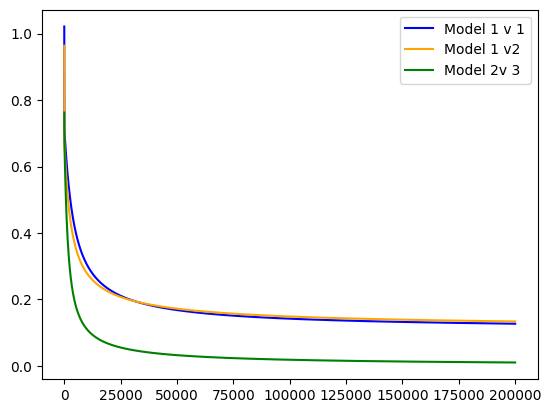

In [245]:
plt.plot(errors_m1, color='Blue', label='Model 1 v 1')
plt.plot(errors_m2, color='Orange', label='Model 1 v2 ')
plt.plot(errors_m3, color='Green', label='Model 2v 3')
plt.legend(loc='best')
plt.show()

In [240]:
def predict(x,y):
        y_hat_m1 =sigmoid(x,theta_m1,theta0_m1)
        y_hat_m1 =[0 if y<=0.5 else 1 for y in y_hat_m1 ]
        y_hat_m2 =sigmoid(x,theta_m2,theta0_m2)
        y_hat_m2 =[0 if y<=0.5 else 1 for y in y_hat_m2 ]
        y_hat_m3 =sigmoid(x,theta_m3,theta0_m3)
        y_hat_m3 =[0 if y<=0.5 else 1 for y in y_hat_m3 ]
        y_hat_m1=np.array(y_hat_m1)
        y_hat_m2=np.array(y_hat_m2)
        y_hat_m3=np.array(y_hat_m3)
        label1=np.zeros(y.shape[0])
        label2=np.zeros(y.shape[0])
        label3=np.zeros(y.shape[0])

        for i in range(y.shape[0]):
                if y_hat_m1[i]==1:
                    label1[i] +=1
                else:
                    label2[i]+=1
        for i in range(y.shape[0]):
                if y_hat_m2[i]==1:
                    label1[i] +=1
                else:
                    label3[i]+=1 
        for i in range(y.shape[0]):
                if y_hat_m3[i]==1:
                    label2[i] +=1
                else:
                    label3[i]+=1
                    
                    
        label1=label1.reshape(y.shape[0],1) 
        label2=label2.reshape(y.shape[0],1)
        label3=label3.reshape(y.shape[0],1)
        concat=np.concatenate((label1,label2,label3 ), axis=1)
        y_true = np.argmax(concat, axis=1)
        y_true=y_true.reshape(y_true.shape[0],1)
        accuracy = np.sum(y== y_true) / (y.shape[0])
        return accuracy
      

In [241]:
accuracy_test=predict(x_tst,y_tst)
print('Test accuracy:',accuracy_test) 


Test accuracy: 0.9047619047619048


In [242]:
accuracy_trn=predict(x_trn,y_trn)
print('Train accuracy:',accuracy_trn) 

Train accuracy: 0.8154761904761905


In [246]:
mean_error=[]
for i in range(len(errors_m1)):
    a,b,c=errors_m1[i],errors_m2[i],errors_m3[i]
    cost=a+b+c
    cost=cost/3
    mean_error.append(cost)
mean_error=np.array(mean_error)

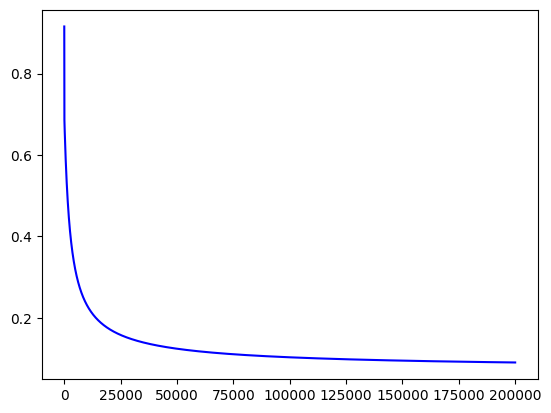

In [247]:
plt.plot(mean_error, color='Blue', label='mean')